<a href="https://colab.research.google.com/github/Mo0nro2e/KickstarterProjects_data_visualization/blob/master/first_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd

In [1]:

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ks-projects-201801.csv to ks-projects-201801.csv
Saving ks-projects-201612.csv to ks-projects-201612.csv
User uploaded file "ks-projects-201801.csv" with length 58030359 bytes
User uploaded file "ks-projects-201612.csv" with length 46500324 bytes


In [12]:
hf = pd.read_csv("/content/ks-projects-201612.csv", sep=',', engine='python')
gf = pd.read_csv("/content/ks-projects-201801.csv", sep=',', engine='python')

gf.describe(include='all') 


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,378657,378661,378661,378661,378661,3.786610e+05,378661,3.786610e+05,378661,378661.000000,378661,3.748640e+05,3.786610e+05,3.786610e+05
unique,NaN,375764,159,15,14,3164,NaN,378089,NaN,6,NaN,23,NaN,NaN,NaN
top,NaN,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,NaN,1970-01-01 01:00:00,NaN,failed,NaN,US,NaN,NaN,NaN
freq,NaN,41,22314,63585,295365,705,NaN,7,NaN,197719,NaN,292627,NaN,NaN,NaN
mean,1.074731e+09,NaN,NaN,NaN,NaN,NaN,4.908079e+04,NaN,9.682979e+03,NaN,105.617476,NaN,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,NaN,NaN,NaN,NaN,NaN,1.183391e+06,NaN,9.563601e+04,NaN,907.185035,NaN,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,NaN,NaN,NaN,NaN,NaN,1.000000e-02,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,NaN,NaN,NaN,NaN,NaN,2.000000e+03,NaN,3.000000e+01,NaN,2.000000,NaN,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,NaN,NaN,NaN,NaN,NaN,5.200000e+03,NaN,6.200000e+02,NaN,12.000000,NaN,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,NaN,NaN,NaN,NaN,NaN,1.600000e+04,NaN,4.076000e+03,NaN,56.000000,NaN,3.034090e+03,4.050000e+03,1.550000e+04


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import seaborn as sns
from scipy import stats
pd.options.display.float_format = '{:,.2f}'.format

In [46]:
#gf['goal ']
gf['goal'] = gf['goal'].astype(float)
gf['pledged'] = gf['pledged'].astype(float)
gf['goal/pledged ratio'] = [(g/p)*100 for (g, p) in zip (gf['pledged'], gf['goal'])]

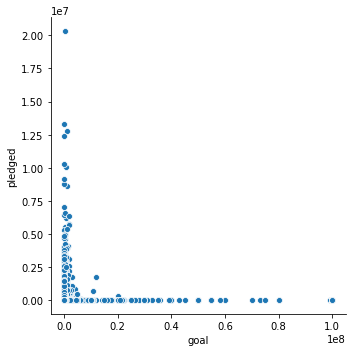

In [47]:


sns.relplot(x="goal", y="pledged", data=gf);

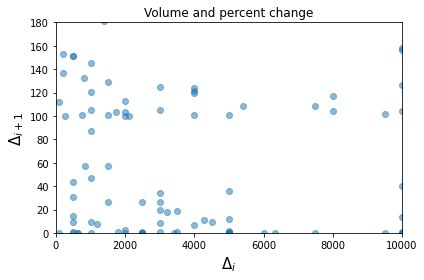

In [56]:
fig, ax = plt.subplots()
gf['goal/pledged ratio'] = [(g/p)*100 for (g, p) in zip (gf['pledged'], gf['goal'])]

ax.scatter(gf['goal'][:150], gf['goal/pledged ratio'][:150], alpha=0.5)
axes = plt.gca()
axes.set_xlim([0,10000])
axes.set_ylim([0,180])
ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(False)
fig.tight_layout()

plt.show()

In [54]:
 
gf['goal'].describe()

count       378,661.00
mean         49,080.79
std       1,183,391.26
min               0.01
25%           2,000.00
50%           5,200.00
75%          16,000.00
max     100,000,000.00
Name: goal, dtype: float64